In [1]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 1)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
Y

array([0, 0, 0, ..., 1, 1, 1])

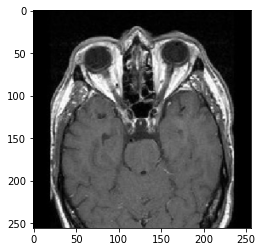

In [6]:
plt.imshow(X[0], cmap='gray')

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

In [7]:
xtrain.shape, xtest.shape

((977, 256, 256, 3), (245, 256, 256, 3))

In [1]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization,MaxPool2D
import numpy as np
tf.keras.backend.clear_session()

In [2]:
CNN = Sequential()

CNN.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu', input_shape = (256,256,3)))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

CNN.add(Flatten())
CNN.add(Dense(256, activation = "relu"))
CNN.add(Dropout(0.25))
CNN.add(Dense(2, activation = "softmax"))

In [4]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 128)       0

In [13]:
CNN.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [14]:
xx=xtrain
yy=ytrain

In [13]:
CNN.fit(xtrain, ytrain, epochs=20, batch_size=20)

Epoch 1/20
49/49 [==============================] - 127s 3s/step - loss: 27.5902 - accuracy: 0.6991
Epoch 2/20
49/49 [==============================] - 137s 3s/step - loss: 0.3669 - accuracy: 0.8516
Epoch 3/20
49/49 [==============================] - 136s 3s/step - loss: 0.3107 - accuracy: 0.8772
Epoch 4/20
49/49 [==============================] - 131s 3s/step - loss: 0.2732 - accuracy: 0.8966
Epoch 5/20
49/49 [==============================] - 129s 3s/step - loss: 0.2048 - accuracy: 0.9202
Epoch 6/20
49/49 [==============================] - 129s 3s/step - loss: 0.2068 - accuracy: 0.9284
Epoch 7/20
49/49 [==============================] - 134s 3s/step - loss: 0.1489 - accuracy: 0.9509
Epoch 8/20
49/49 [==============================] - 131s 3s/step - loss: 0.1338 - accuracy: 0.9560
Epoch 9/20
49/49 [==============================] - 137s 3s/step - loss: 0.1133 - accuracy: 0.9632
Epoch 10/20
49/49 [==============================] - 137s 3s/step - loss: 0.0913 - accuracy: 0.9652
Epoch 11

In [15]:
pred = CNN.predict(xtest)

8/8 [==============================] - 6s 725ms/step


In [26]:
# misclassified=np.where(ytest!=pred)
# misclassified

In [27]:
# print("Total Misclassified Samples: ",len(misclassified[0]))
# print(pred[36],ytest[36])

In [18]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

1/1 [==============================] - 0s 46ms/step
[[1.0000000e+00 1.4962391e-10]]
1/1 [==============================] - 0s 48ms/step
[[1.0000000e+00 5.5428295e-08]]
1/1 [==============================] - 0s 43ms/step
[[9.9994862e-01 5.1363146e-05]]
1/1 [==============================] - 0s 45ms/step
[[9.9999976e-01 1.8361514e-07]]
1/1 [==============================] - 0s 59ms/step
[[0.94935703 0.05064292]]
1/1 [==============================] - 0s 46ms/step
[[1.0000000e+00 3.9269006e-09]]
1/1 [==============================] - 0s 48ms/step
[[9.9999976e-01 2.0128192e-07]]
1/1 [==============================] - 0s 54ms/step
[[9.9999964e-01 3.3688997e-07]]
1/1 [==============================] - 0s 52ms/step
[[1.0000000e+00 1.3396573e-11]]


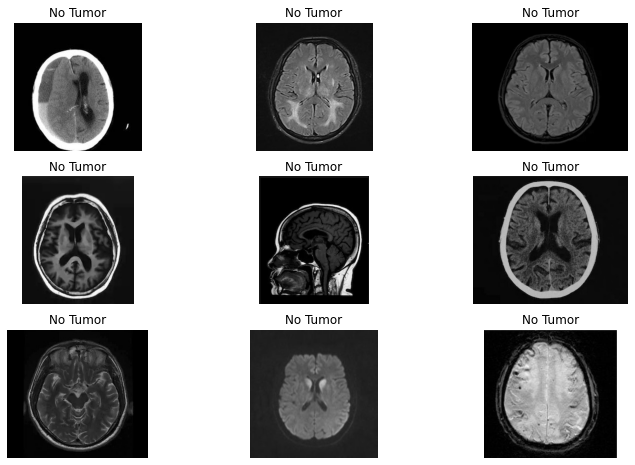

In [19]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,1)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 3)
    p = CNN.predict(img1)
#     print(p)
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

1/1 [==============================] - 0s 45ms/step
[[1.0000000e+00 1.5004824e-11]]
1.0
1/1 [==============================] - 0s 44ms/step
[[1.0000000e+00 3.0856784e-12]]
1.0
1/1 [==============================] - 0s 43ms/step
[[1.0000000e+00 5.1716423e-19]]
1.0
1/1 [==============================] - 0s 43ms/step
[[1.0000000e+00 2.8244873e-10]]
1.0
1/1 [==============================] - 0s 48ms/step
[[1.0000000e+00 2.2279177e-15]]
1.0
1/1 [==============================] - 0s 56ms/step
[[1.000000e+00 1.870527e-16]]
1.0
1/1 [==============================] - 0s 52ms/step
[[1.0000000e+00 9.0257535e-09]]
1.0
1/1 [==============================] - 0s 51ms/step
[[1.0000000e+00 1.5004824e-11]]
1.0
1/1 [==============================] - 0s 46ms/step
[[1.0000000e+00 9.0257535e-09]]
1.0
1/1 [==============================] - 0s 50ms/step
[[1.0000000e+00 9.0257535e-09]]
1.0
1/1 [==============================] - 0s 52ms/step
[[0.21760301 0.7823969 ]]
0.21760301
1/1 [============================

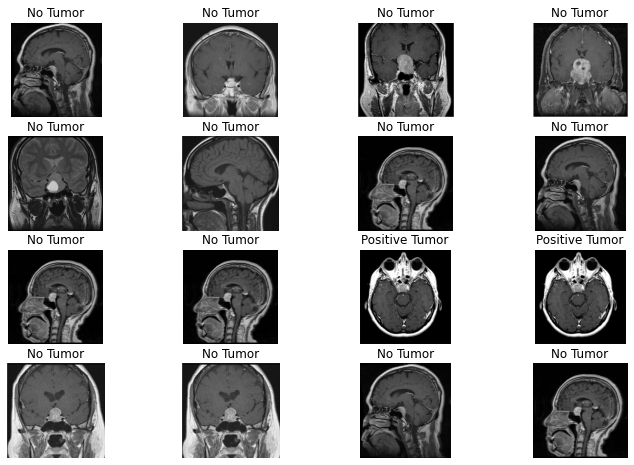

In [20]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,1)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 3)
    p = CNN.predict(img1)
#     print(p)
#     print(p[0][0])
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [25]:
pred_y = np.argmax(pred, axis=1)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,precision_score, f1_score, recall_score,accuracy_score
print("CNN Model Metrics")
print('Accuracy: ', accuracy_score(ytest, pred_y))
print('Precision: ', precision_score(ytest, pred_y))
print('F1 Score: ', f1_score(ytest, pred_y))
print('Recall Score: ', recall_score(ytest, pred_y))
print('Roc Auc Score: ', roc_auc_score(ytest, pred_y))

CNN Model Metrics
Accuracy:  0.3306122448979592
Precision:  0.0
F1 Score:  0.0
Recall Score:  0.0
Roc Auc Score:  0.5


C:\Users\Usaer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
